In [1]:
import numpy as np 
import tensorflow as tf
import tensorflow_probability as tfp
# -- diffhod --
from diffhod import diffhod
# -- plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

Text(0, 0.5, '$<N_{\\rm cen}>$')

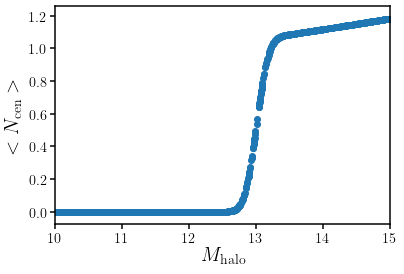

In [2]:
Mhalo = tf.convert_to_tensor(np.random.uniform(10., 15., 1000), dtype=tf.float32)

theta = tf.convert_to_tensor(np.array([13., 0.2, 12., 14., 1.1]), dtype=tf.float32)

nhalo = diffhod.Ncen(Mhalo, theta) + diffhod.Nsat(Mhalo, theta)

fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(Mhalo, nhalo)
sub.set_xlabel(r'$M_{\rm halo}$', fontsize=20)
sub.set_xlim(10., 15.)
sub.set_ylabel(r'$<N_{\rm cen}>$', fontsize=20)

Text(0, 0.5, '$<N_{\\rm cen}>$')

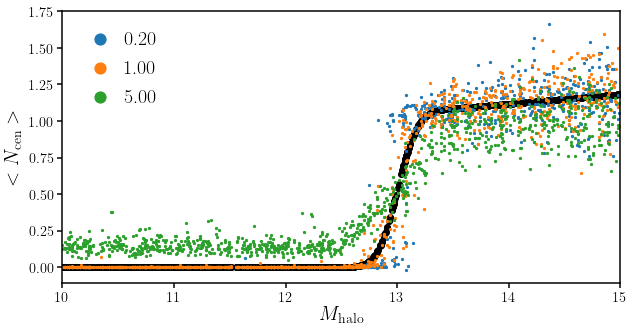

In [3]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.scatter(Mhalo, nhalo, c='k')
for temp in [0.2, 1., 5.]: 
    sub.scatter(Mhalo, diffhod.hod(Mhalo, theta, temperature=temp), s=5, label='%.2f' % temp)
sub.legend(loc='upper left', markerscale=5, handletextpad=0.2, fontsize=20)
sub.set_xlabel(r'$M_{\rm halo}$', fontsize=20)
sub.set_xlim(10., 15.)
sub.set_ylabel(r'$<N_{\rm cen}>$', fontsize=20)

In [4]:
def numden(_Mhalo, Mmin, siglogm, M0, M1, alpha): 
    _theta = [Mmin, siglogm, M0, M1, alpha]
    return tf.reduce_sum(diffhod.hod(_Mhalo, _theta))

In [5]:
Mmin_true = 13.
siglogm_true = 0.4
M0_true = 12.
M1_true = 14.
alpha_true = 1.1
numden_true = numden(Mhalo, Mmin_true, siglogm_true, M0_true, M1_true, alpha_true).numpy()
print(numden_true)

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

_Mmin = tf.Variable(13.2, trainable=True, dtype=tf.float32)
_siglogm = tf.Variable(0.3, trainable=True, dtype=tf.float32)
_M0 = tf.Variable(12.5, trainable=True, dtype=tf.float32)
_M1 = tf.Variable(13.5, trainable=True, dtype=tf.float32)
_alpha = tf.Variable(1.3, trainable=True, dtype=tf.float32)

trainable_variables = [_Mmin, _siglogm, _M0, _M1, _alpha]

431.7237


In [6]:
mass_hist = []
for i in range(100):
    with tf.GradientTape() as tape:
        loss = (numden_true - numden(Mhalo, _Mmin, _siglogm, _M0, _M1, _alpha))**2
    gradients = tape.gradient(loss, trainable_variables)
    opt.apply_gradients(zip(gradients, trainable_variables))
    mass_hist.append([_Mmin.numpy(), _siglogm.numpy(), _M0.numpy(), _M1.numpy(), _alpha.numpy()])

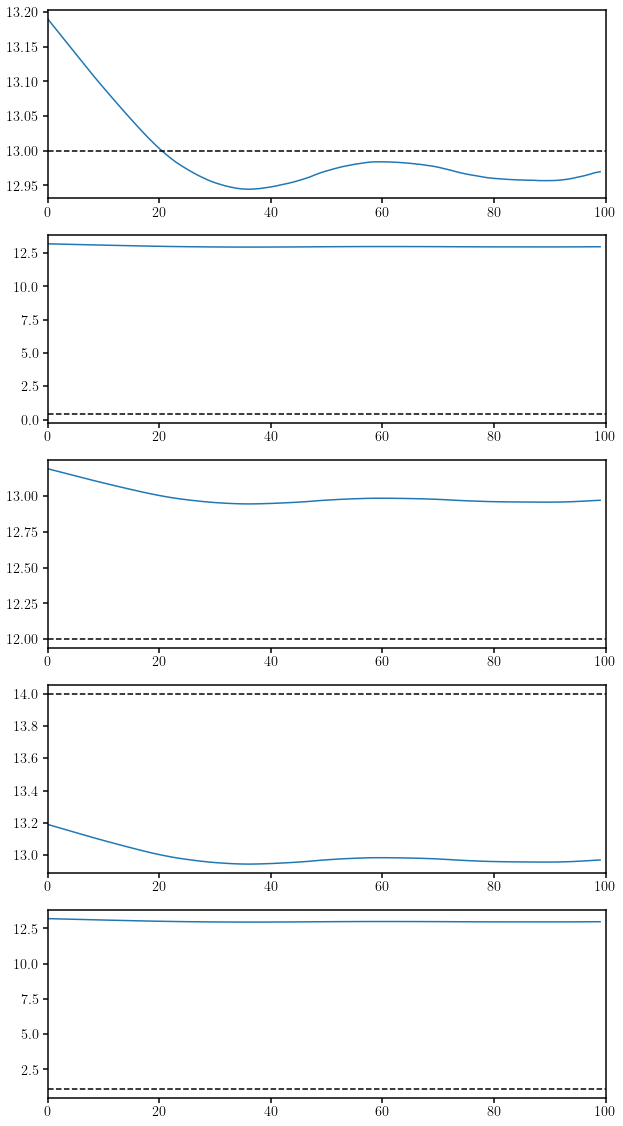

In [7]:
_true = [Mmin_true, siglogm_true, M0_true, M1_true, alpha_true]

fig = plt.figure(figsize=(10,20))
for i in range(1,6): 
    sub = fig.add_subplot(5,1,i)
    sub.plot(np.array(mass_hist)[:,0])
    sub.axhline(_true[i-1], c='k', linestyle='--')
    sub.set_xlim(0,100)